# BIG MART SALES
### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to **build a predictive model and find out the sales of each product at a particular store.**
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1]:
# Load Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Training Data
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train.shape

(8523, 12)

In [5]:
# Number of Products
len(train.Item_Identifier.unique())

1559

In [6]:
# Number of Stores
len(train.Outlet_Identifier.unique())

10

In [7]:
# Create ITEM_WEIGHT TABLE
items = train.Item_Identifier.unique()
item_weight = []
for item in items:
    w = train.Item_Weight[train.Item_Identifier == item].dropna().values
    if len(w) == 0:
        x = 0
    else:
        x = w[0].astype(float)
    item_weight = np.append(item_weight, x)

In [8]:
iw = pd.Series(item_weight, index = items)
iw.head()

FDA15     9.30
DRC01     5.92
FDN15    17.50
FDX07    19.20
NCD19     8.93
dtype: float64

In [9]:
# Removing Missing values in weight..
# For weights which did not exist  were substituted with '0'
for item in iw.index:
    train.Item_Weight[train.Item_Identifier == item] = iw[item]


D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
# Removing Missing values in weight..
# For weights which did not exist  were substituted with '0'
for item in iw.index:
    test.Item_Weight[test.Item_Identifier == item] = iw[item]


D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
# Create ITEM_WEIGHT TABLE
outlets = train.Outlet_Identifier.unique()
outlet_size = []
for outlet in outlets:
    s = train.Outlet_Size[train.Outlet_Identifier == outlet].dropna().values
    if len(s) == 0:
        s=0
    else:
        s = s[0]
    outlet_size = np.append(outlet_size, s)

In [11]:
os = pd.Series(outlet_size, index = outlets)
os

OUT049    Medium
OUT018    Medium
OUT010         0
OUT013      High
OUT027    Medium
OUT045         0
OUT017         0
OUT046     Small
OUT035     Small
OUT019     Small
dtype: object

In [12]:
pd.crosstab(train.Outlet_Size, train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


### Groccery Stores have a small size

In [13]:
x = []
for out in os.index:
    x =  np.append(x,train.Outlet_Type[train.Outlet_Identifier == out].unique())
size_type = pd.DataFrame({'size': os.values,'type':x}, index = os.index)
size_type

,size,type
OUT049,Medium,Supermarket Type1
OUT018,Medium,Supermarket Type2
OUT010,0,Grocery Store
OUT013,High,Supermarket Type1
OUT027,Medium,Supermarket Type3
OUT045,0,Supermarket Type1
OUT017,0,Supermarket Type1
OUT046,Small,Supermarket Type1
OUT035,Small,Supermarket Type1
OUT019,Small,Grocery Store


In [14]:
train.Outlet_Size[train.Outlet_Type == 'Grocery Store'] = 'Small'

D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
test.Outlet_Size[test.Outlet_Type == 'Grocery Store'] = 'Small'

D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
# Missing Values Left
np.sum(pd.isnull(train.Outlet_Size))

1855

### Supermarket Type1 in Tier 2 is small in size

In [16]:
pd.crosstab(train.Outlet_Size, [train.Outlet_Type,train.Outlet_Location_Type])

Outlet_Type          Grocery Store        Supermarket Type1                \
Outlet_Location_Type        Tier 1 Tier 3            Tier 1 Tier 2 Tier 3   
Outlet_Size                                                                 
High                             0      0                 0      0    932   
Medium                           0      0               930      0      0   
Small                          528    555               930    930      0   

Outlet_Type          Supermarket Type2 Supermarket Type3  
Outlet_Location_Type            Tier 3            Tier 3  
Outlet_Size                                               
High                                 0                 0  
Medium                             928               935  
Small                                0                 0

In [17]:
train.Outlet_Size[(train.Outlet_Type == 'Supermarket Type1') & (train.Outlet_Location_Type == 'Tier 2')] = 'Small'

D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
test.Outlet_Size[(test.Outlet_Type == 'Supermarket Type1') & (test.Outlet_Location_Type == 'Tier 2')] = 'Small'

D:\Personal\Setups\Anaconda440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Checking missing values

In [31]:
# Missing Values Left in the training set
np.sum(pd.isnull(train))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
# Missing Values Left in test set
np.sum(pd.isnull(test))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Reindexing Test and Training sets

In [108]:
train_indexed = train.set_index(['Item_Identifier', 'Outlet_Identifier'],drop = True)
train_indexed.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
# Combinations of product and items
len(train_indexed.index.unique())

8523

In [110]:
test_indexed = test.set_index(['Item_Identifier', 'Outlet_Identifier'],drop = True)
test_indexed.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,Outlet_Identifier,,,,,,,,,
FDW58,OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14,OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,Small,Tier 2,Supermarket Type1
NCN55,OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,Small,Tier 3,Grocery Store
FDQ58,OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Small,Tier 2,Supermarket Type1
FDY38,OUT027,13.600,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


# Vairables

In [111]:
train_indexed.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Item Variables

In [112]:
var_items = train_indexed.dtypes[:-5].index
var_items
# var_outlets = train_indexed.dtypes[5:-1]

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP'],
      dtype='object')

#### Outlet Variables

In [113]:
var_outlets = train_indexed.dtypes[5:-1].index
var_outlets
# var_outlets = train_indexed.dtypes[5:-1]

Index(['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# Label Encoding

In [114]:
train_indexed.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
# Categorical Variables
cat_vars = train_indexed.columns[train_indexed.dtypes == 'object']
cat_vars

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in cat_vars:
    train_indexed[var] = le.fit_transform(train_indexed[var].astype(str))
    test_indexed[var] = le.fit_transform(test_indexed[var].astype(str))
train_indexed.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,1,0.016047,10,249.8092,1999,1,0,1,3735.1380
DRC01,OUT018,5.92,2,0.019278,6,48.2692,2009,1,2,2,443.4228
FDN15,OUT049,17.50,1,0.016760,2,141.6180,1999,1,0,1,2097.2700
FDX07,OUT010,19.20,2,0.000000,12,182.0950,1998,2,2,0,732.3800
NCD19,OUT013,8.93,1,0.000000,15,53.8614,1987,0,2,1,994.7052


In [139]:
test_indexed.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,Outlet_Identifier,,,,,,,,,
FDW58,OUT049,20.750,1,0.007565,13,107.8622,1999,1,0,1
FDW14,OUT017,8.300,4,0.038428,4,87.3198,2007,2,1,1
NCN55,OUT010,14.600,1,0.099575,11,241.7538,1998,2,2,0
FDQ58,OUT017,7.315,1,0.015388,13,155.0340,2007,2,1,1
FDY38,OUT027,13.600,2,0.118599,4,234.2300,1985,1,2,3


# Model Building

In [117]:
y = train_indexed['Item_Outlet_Sales']
X = train_indexed[train_indexed.columns[:-1]]
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [119]:
from sklearn.ensemble import RandomForestRegressor
rmse_arr = []
for i in np.arange(1,300,10):
    rf = RandomForestRegressor(n_estimators=i, 
                           criterion='mse', 
                           max_depth=10, 
                           min_samples_leaf=30).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse_arr = np.append(rmse_arr, np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred)))

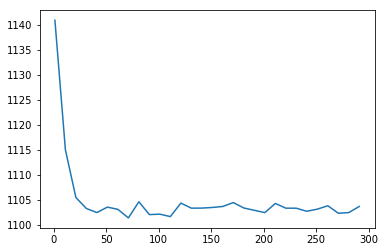

In [120]:
plt.figure()
plt.plot(np.arange(1,300,10), rmse_arr)

In [123]:
from sklearn.ensemble import RandomForestRegressor
rmse_arr_d = []
x = np.arange(1,20)
for i in x:
    rf = RandomForestRegressor(n_estimators=70, 
                           criterion='mse', 
                           max_depth=i, 
                           min_samples_leaf=30).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse_arr_d = np.append(rmse_arr_d, np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred)))

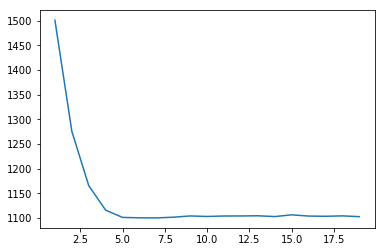

In [124]:
plt.figure()
plt.plot(x, rmse_arr_d)

In [132]:
from sklearn.ensemble import RandomForestRegressor
rmse_arr_l = []
x = np.arange(1,100,3)
for i in x:
    rf = RandomForestRegressor(n_estimators=70, 
                           criterion='mse', 
                           max_depth=6, 
                           min_samples_leaf=i).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rmse_arr_l = np.append(rmse_arr_l, np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred)))

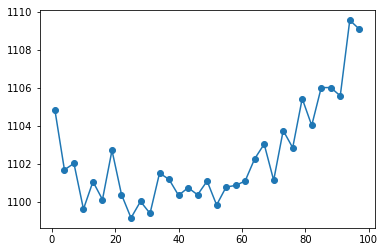

In [133]:
plt.figure()
plt.plot(x, rmse_arr_l,'-o')

### Random Forest with  optimum values


In [134]:
rf = RandomForestRegressor(n_estimators=70, 
                       criterion='mse', 
                       max_depth=6, 
                       min_samples_leaf=22).fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred))
print ('RMSE on the Cross validation Set is: ', rmse)

RMSE on the Cross validation Set is:  1099.43266074


# Modelling on the entire test set

In [140]:
X_train = X
y_train = y
X_test = test_indexed

In [141]:
X_test.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,Outlet_Identifier,,,,,,,,,
FDW58,OUT049,20.750,1,0.007565,13,107.8622,1999,1,0,1
FDW14,OUT017,8.300,4,0.038428,4,87.3198,2007,2,1,1
NCN55,OUT010,14.600,1,0.099575,11,241.7538,1998,2,2,0
FDQ58,OUT017,7.315,1,0.015388,13,155.0340,2007,2,1,1
FDY38,OUT027,13.600,2,0.118599,4,234.2300,1985,1,2,3


In [142]:
rf = RandomForestRegressor(n_estimators=70, 
                       criterion='mse', 
                       max_depth=6, 
                       min_samples_leaf=22).fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Submimssion

In [144]:
ss = pd.read_csv('ss.csv')
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [150]:
ss.Item_Outlet_Sales = y_pred
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1642.744940
1,FDW14,OUT017,1372.295601
2,NCN55,OUT010,632.567993
3,FDQ58,OUT017,2499.972271
4,FDY38,OUT027,6086.026692


In [151]:
ss.to_csv('rf_sub_sumitkant.csv', sep=',', index= False)